In [1]:
import glob
import re
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


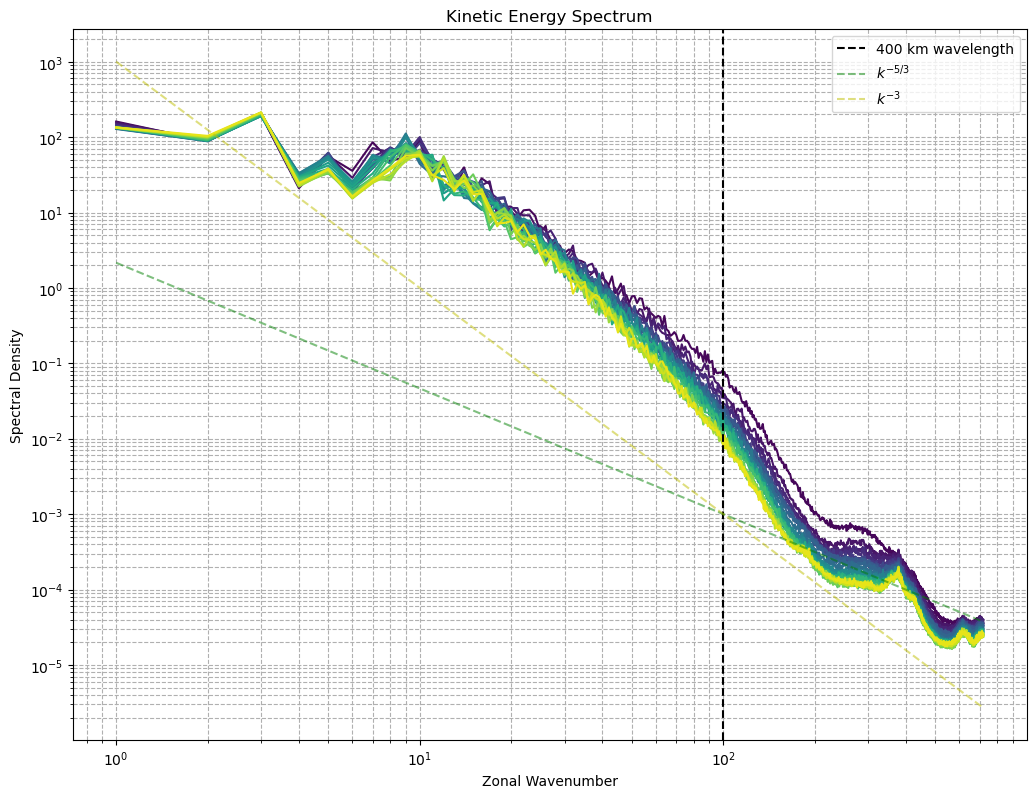

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(16/1.3, 12/1.3))

data = xr.open_dataset("/data/GC_output/analysis/GC_output_test.nc")

colors = sns.color_palette('viridis', 52)
# 기존 데이터 플롯 (여기서는 두 변수 "divor"와 "uv"에 대해)
for i in range(0,52, 2):
    spc = data['spectrum'].isel(level=17, time=i)
    x = data['wavenumber']
    # n=0 (즉, k=0)는 로그 플롯에 문제가 될 수 있으므로 인덱스 1부터 플롯
    plt.loglog(x[1:], spc[1:], color=colors[i])

# 1. 400km 파장에 해당하는 wavenumber에 수직선 추가
# zonal wavenumber index at wavelength 400km

# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

# 2. k^{-5/3} 및 k^{-3} 추세선 (붉은색 점선) 추가
#    먼저, 데이터와 같은 x범위를 갖도록 k 값 배열을 생성합니다.
#    x[1:]에서 최소, 최대 값을 추출합니다.
k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

# 기준점을 400km (k_400)에서 y값 y_ref로 맞추어 평행이동합니다.
# y축 범위가 약 1e2 ~ 1e-10이므로, 기하평균 1e-4 정도를 기준값으로 선택
y_ref = 1e-3

# k^{-5/3} 추세선을 (k_400, y_ref)를 지나도록 상수 A_5_3 결정:
A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

# k^{-3} 추세선도 (k_400, y_ref)를 지나도록 상수 A_3 결정:
A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# 두 추세선을 붉은색 점선으로 그리기
plt.loglog(k_vals[:], trend_5_3[:], 'g1--', label=r'$k^{-5/3}$', alpha=0.5)
plt.loglog(k_vals[:], trend_3[:], 'y--', label=r'$k^{-3}$', alpha=0.5)

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
plt.title('GraphCast Kinetic Energy Spectrum\n300hPa, 12-hrly, ')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


In [50]:
import xarray as xr

U = xr.open_dataset("/atmdata2/ERA5/Monthly_means/Pressure_levels/Uwind.nc")
V = xr.open_dataset("/atmdata2/ERA5/Monthly_means/Pressure_levels/Vwind.nc")


In [9]:
xr.open_zarr("/geodata2/Gencast/output/2021-06-21.zarr").squeeze()[["u_component_of_wind", "v_component_of_wind"]].to_netcdf("/geodata2/Gencast/output/2021-06-21.nc")

In [28]:
data = xr.open_zarr("/geodata2/Gencast/output/2021-06-21.zarr").squeeze()[["u_component_of_wind", "v_component_of_wind"]]
data = data.transpose("time", "level", "sample","lat", "lon")

data = data.rename({"u_component_of_wind": "u", "v_component_of_wind": "v"})

data
for i in range(16):
    data.isel(sample=i).to_netcdf(f"/geodata2/Gencast/output/ens_2021-06-21/{i}.nc", mode="w")

In [64]:
data = xr.open_dataset("/data/GC_output/2021-06-21/GC_output_uv.nc")
data

<xarray.Dataset> Size: 16GB
Dimensions:              (time: 52, level: 37, lat: 721, lon: 1440)
Coordinates:
  * lon                  (lon) float32 6kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * lat                  (lat) float32 3kB -90.0 -89.75 -89.5 ... 89.75 90.0
  * level                (level) int32 148B 1 2 3 5 7 ... 900 925 950 975 1000
  * time                 (time) timedelta64[ns] 416B 0 days 06:00:00 ... 13 d...
Data variables:
    u_component_of_wind  (time, level, lat, lon) float32 8GB ...
    v_component_of_wind  (time, level, lat, lon) float32 8GB ...